In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Différents CSVs intéressants

 - ID1, ID2 : CSVs permettant d'identifier les établissements
 - FILTRE : CSV énonçant la liste des soins disponibles dans un établissement
 - MCO, Psychatrie, [tout le reste...] : CSVs indiquant les détails de capacité, et d'hospitalisation au sein de ce service dans un établissement donné
 

In [40]:
id_ = pd.read_csv('CSV/ID_2019r.csv',sep=';').rename(columns = {'fi':'FI','fi_ej':'FI_EJ'})
filtre = pd.read_csv('CSV/FILTRE_2019r.csv',sep=';')
idb = pd.read_csv('CSV/IDB_2019a.csv',sep=';')

In [42]:
print( f'lignes id_ : {len(id_)}, lignes filtre : {len(filtre)}, lignes idb : {len(idb)}')

lignes id_ : 4018, lignes filtre : 8022, lignes idb : 5670


In [79]:
id_filtre = pd.merge(id_,filtre,on='FI')

In [90]:
list_col =[]
b= False
for i in id_filtre.columns:
    if i == 'HEB_MED':
        b = True
    if b :
        list_col.append(i)

In [125]:
dom_per_dep = id_filtre.groupby('dep')['HEB_MED'].sum().reset_index()
for dom in list_col[1:]:
    dom_per_dep[dom] = list(id_filtre.groupby('dep')[dom].sum())
#dom_per_dep

In [120]:
dom_per_reg = id_filtre.groupby('reg')['HEB_MED'].sum().reset_index()
for dom in list_col[1:]:
    dom_per_reg[dom] = list(id_filtre.groupby('reg')[dom].sum())
#dom_per_reg

In [143]:
dep = pd.read_csv('INSEE/departement2020.csv')
reg = pd.read_csv('INSEE/region2020.csv')

In [148]:
dom_per_dep.sort_values('dep')
dep.sort_values('dep')
dom_per_dep['Nom Departement'] = dep['ncc']

In [155]:
dom_per_reg.sort_values('reg')
reg.sort_values('reg')
dom_per_reg['Nom Region'] = reg['ncc']

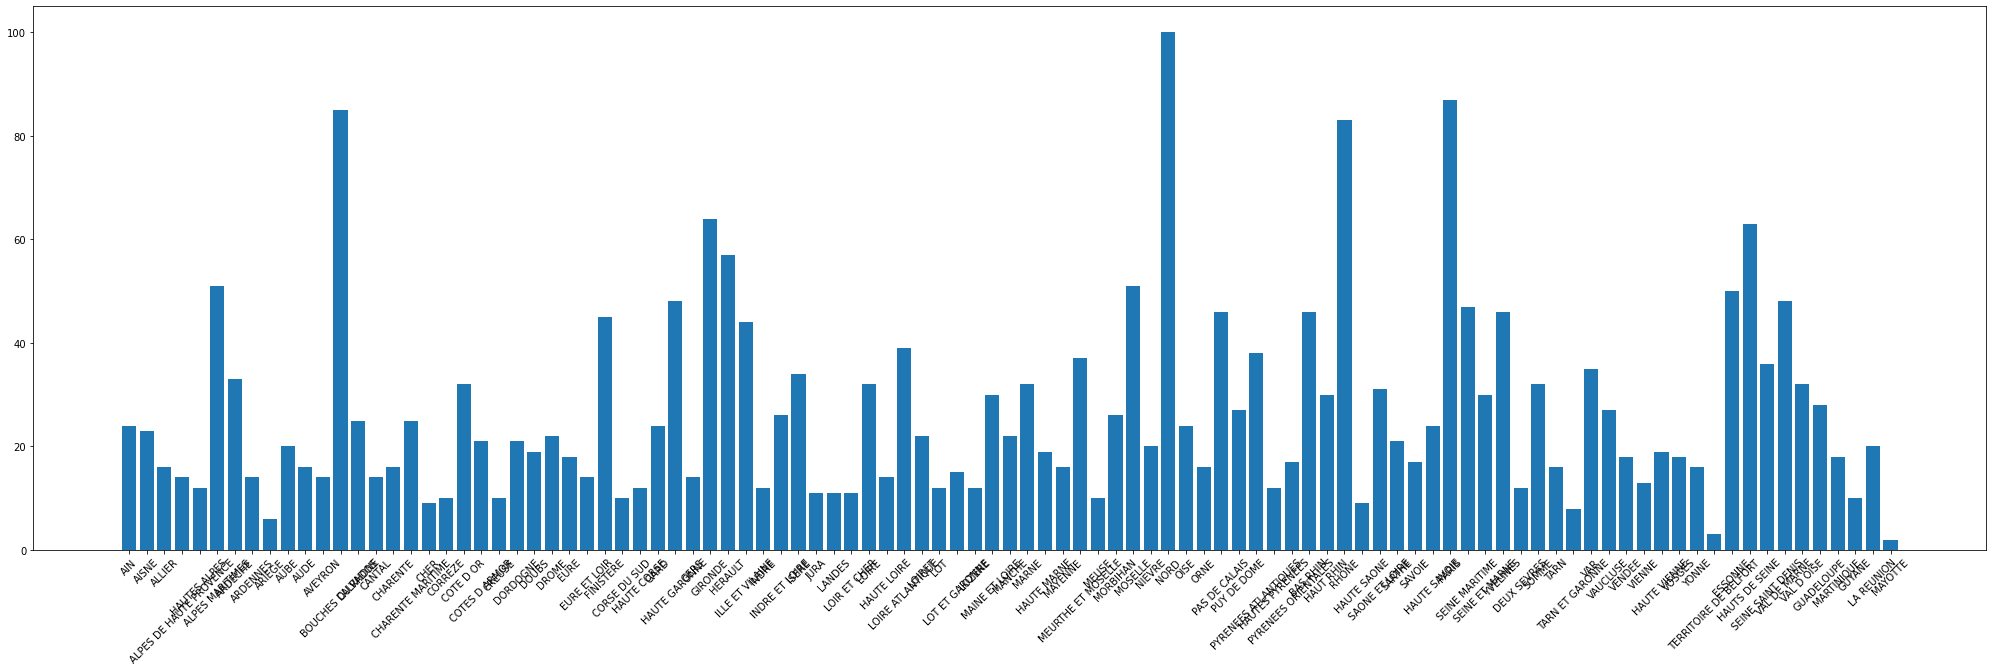

In [169]:
plt.figure(figsize=(35,10))
plt.bar(dom_per_dep['Nom Departement'],dom_per_dep['HEB_MED'])
plt.xticks(rotation=45)
plt.show()

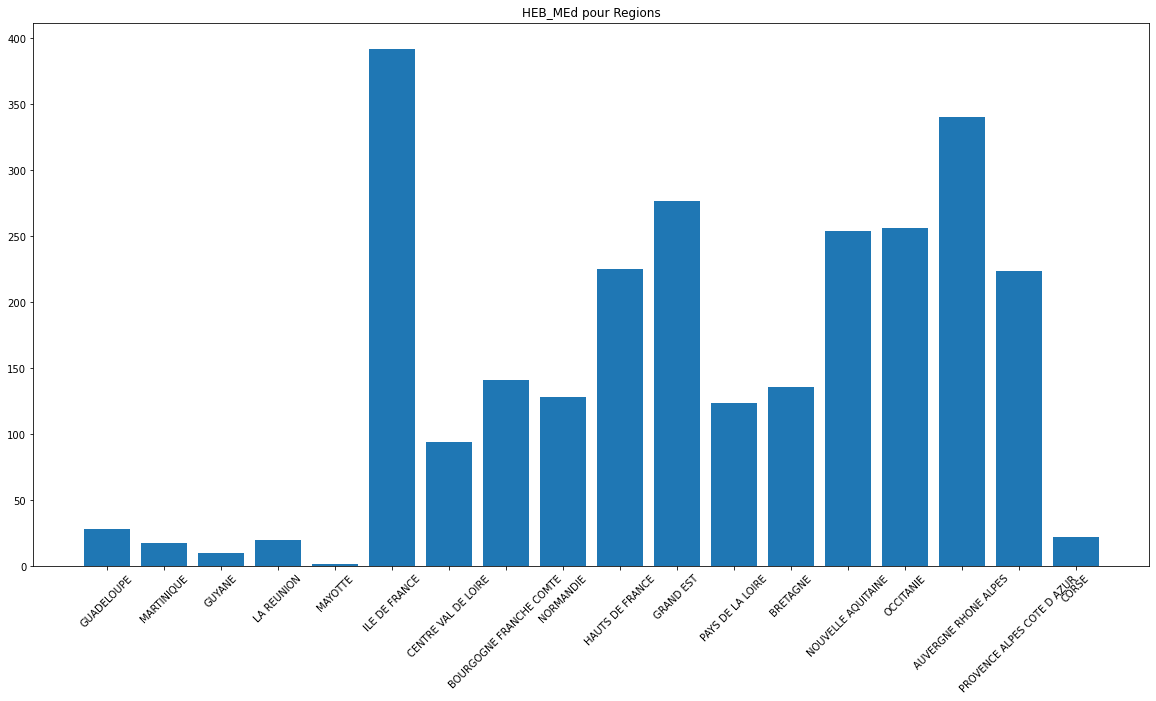

In [170]:
plt.figure(figsize=(20,10))
plt.bar(dom_per_reg['Nom Region'],dom_per_reg['HEB_MED'])
plt.title(f'HEB_MED pour Regions')
plt.xticks(rotation=45)
plt.show()

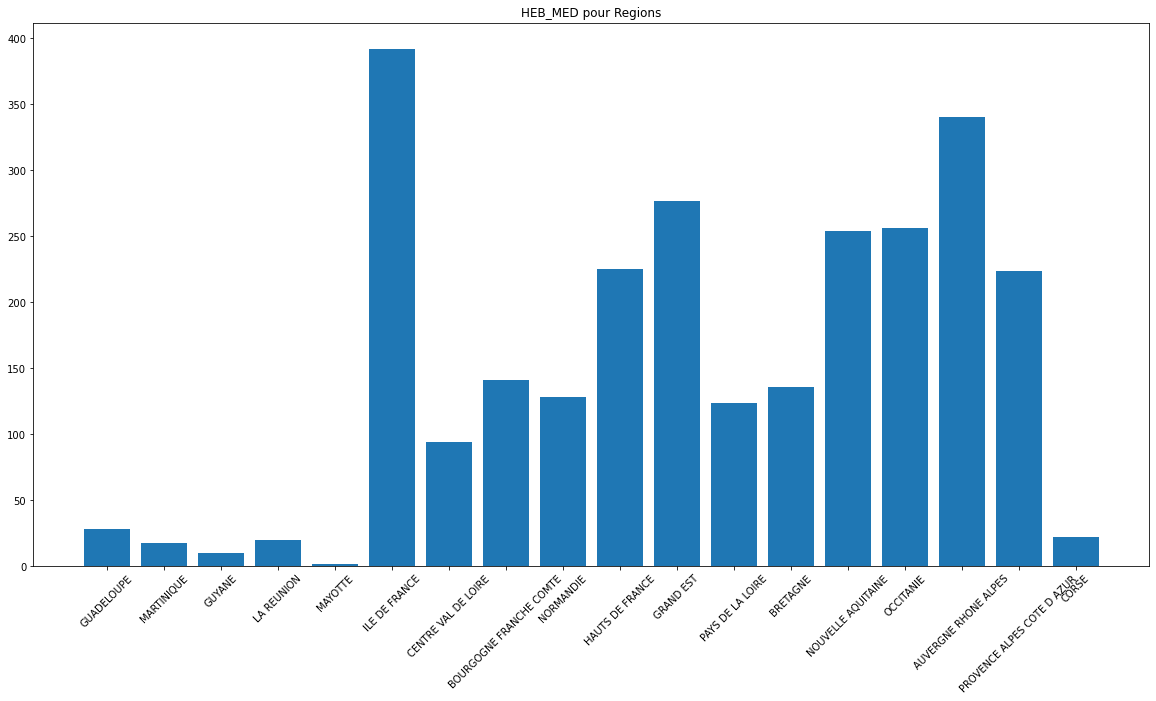

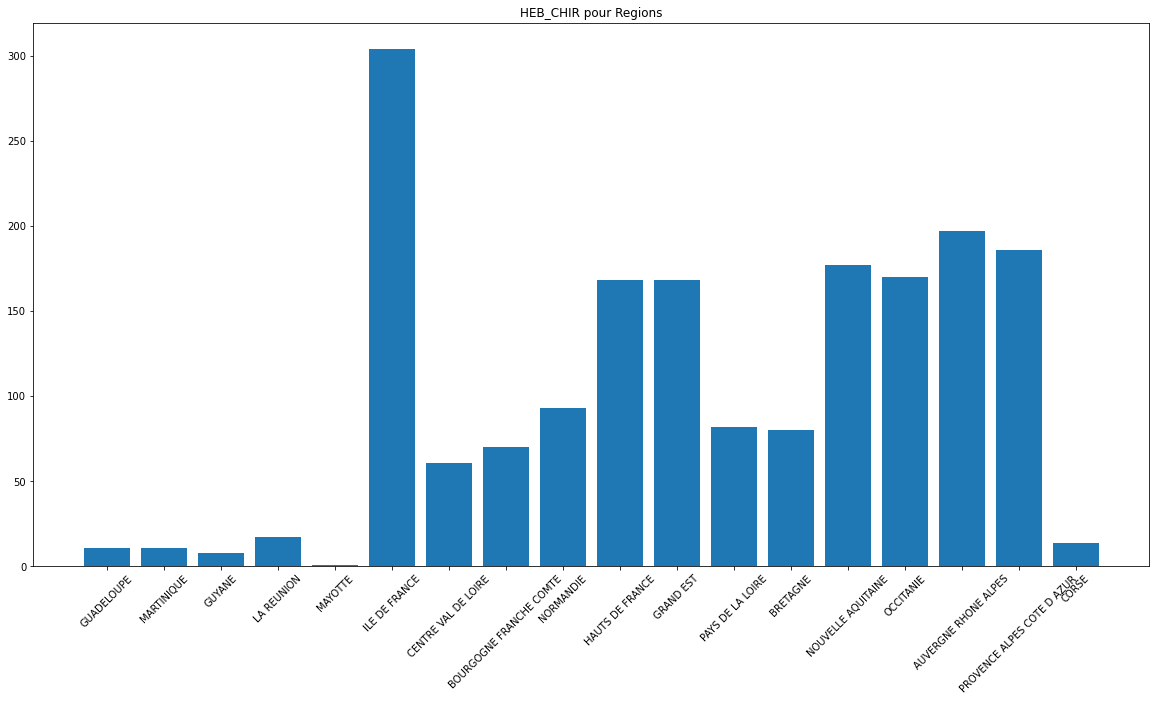

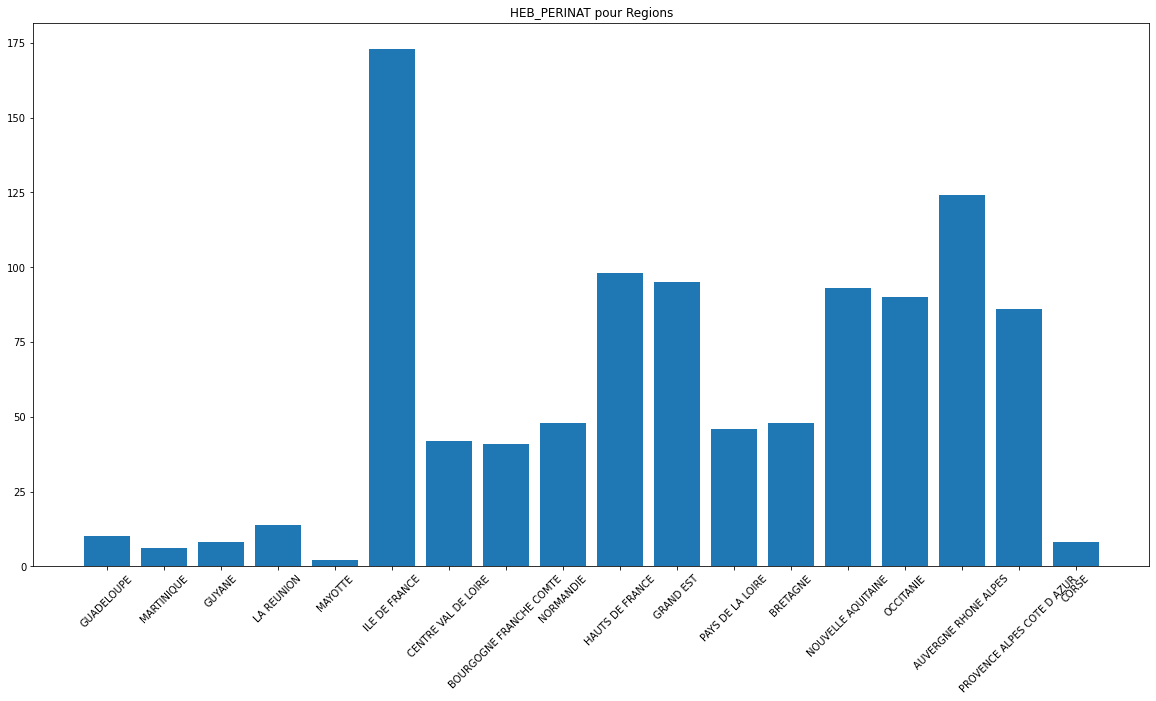

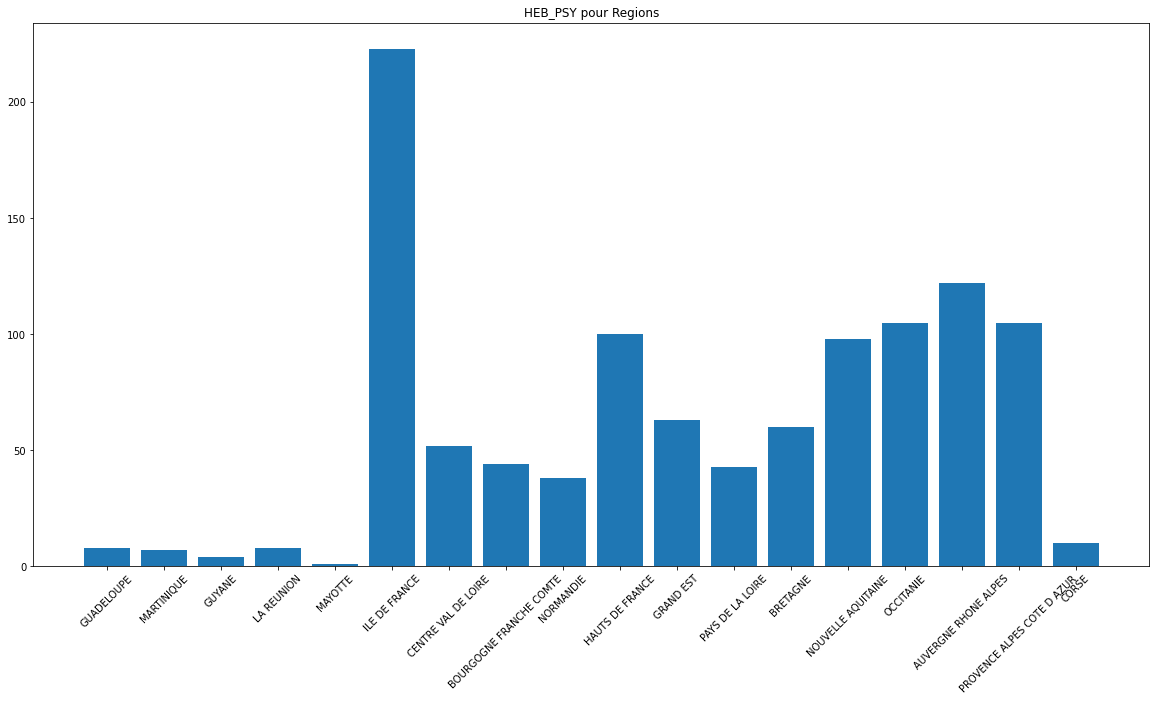

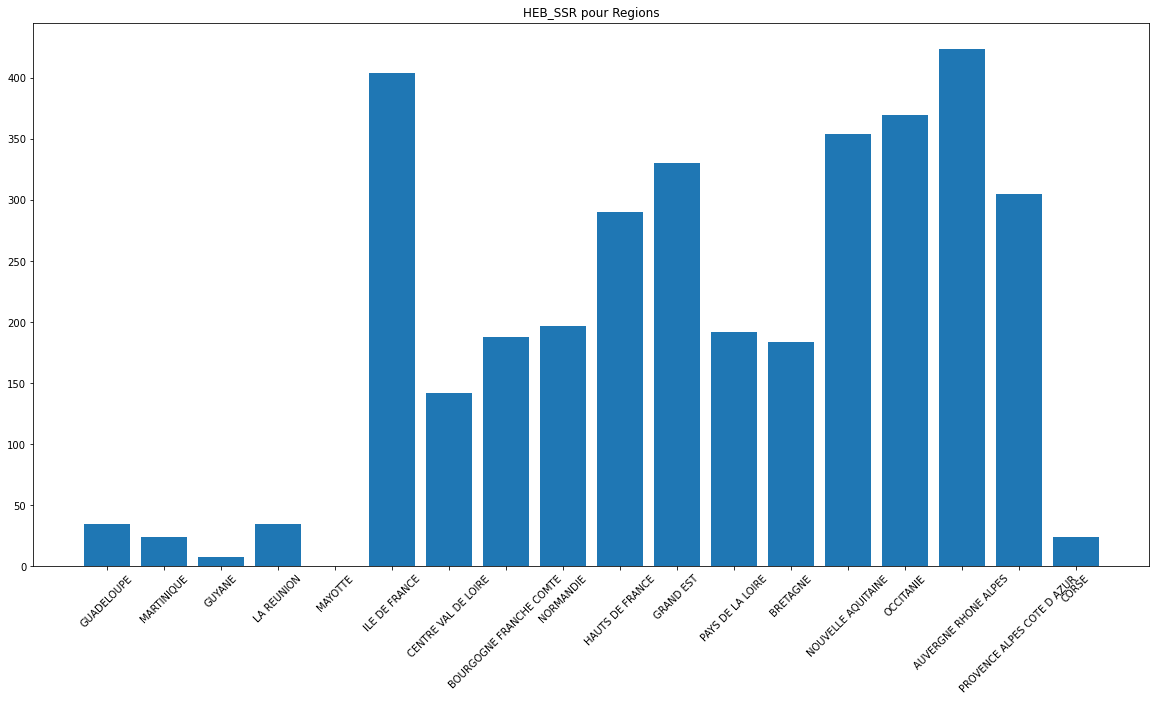

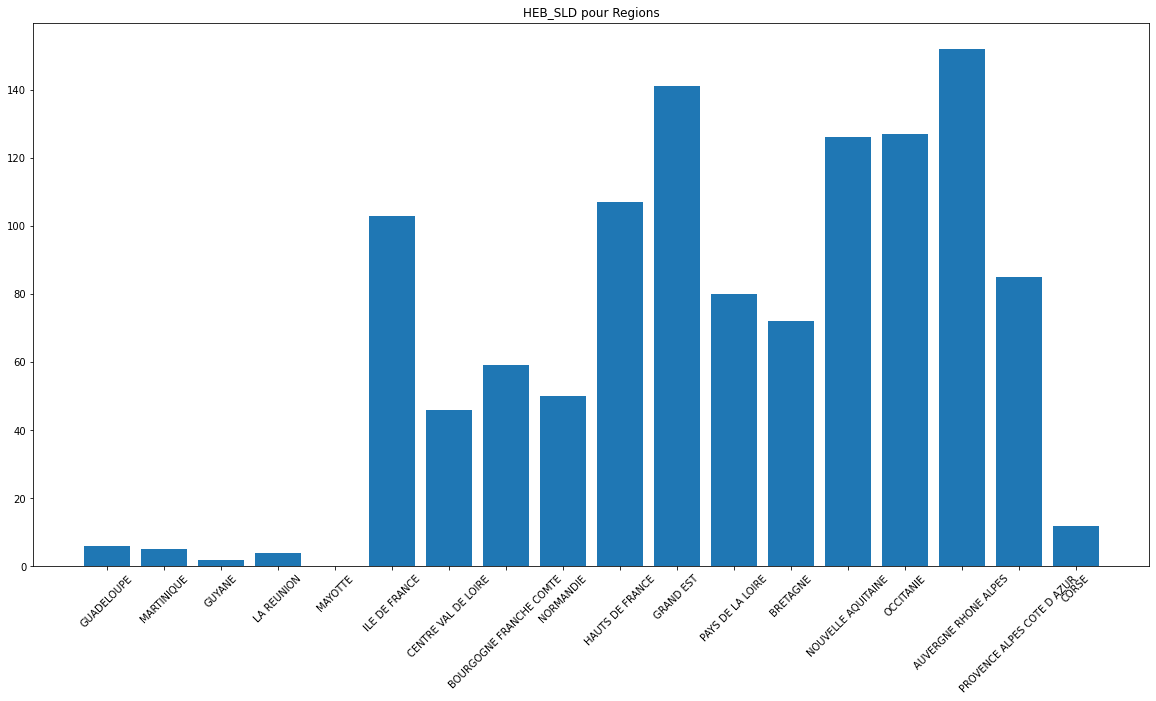

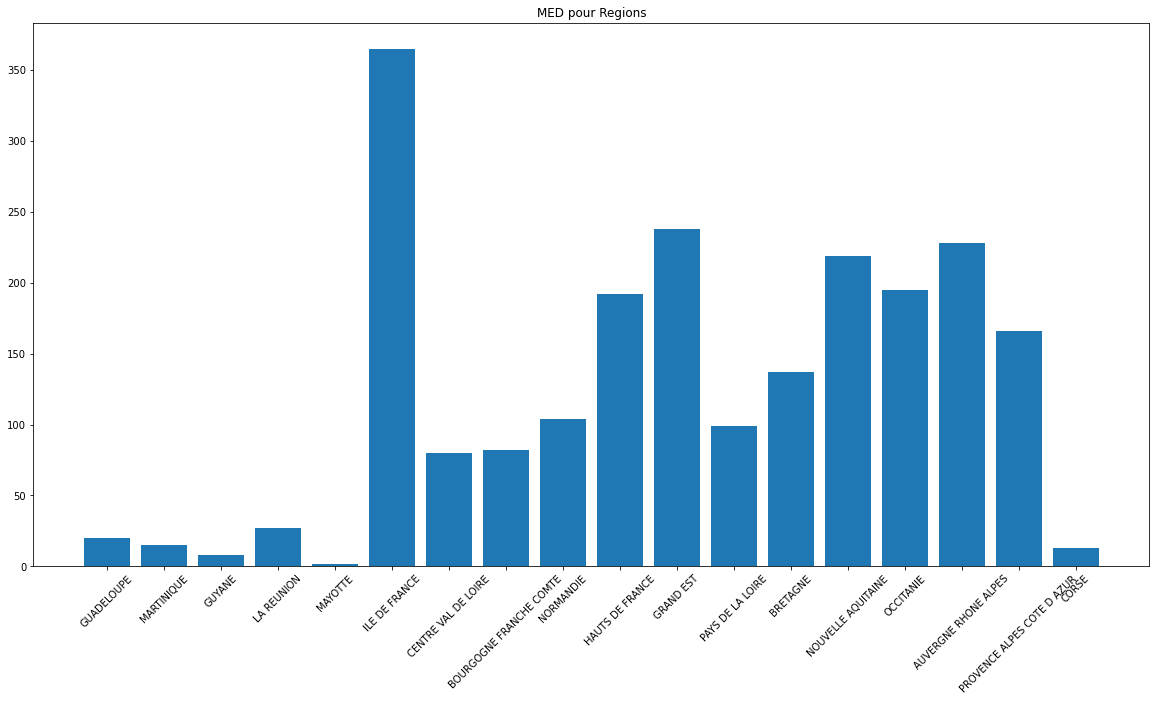

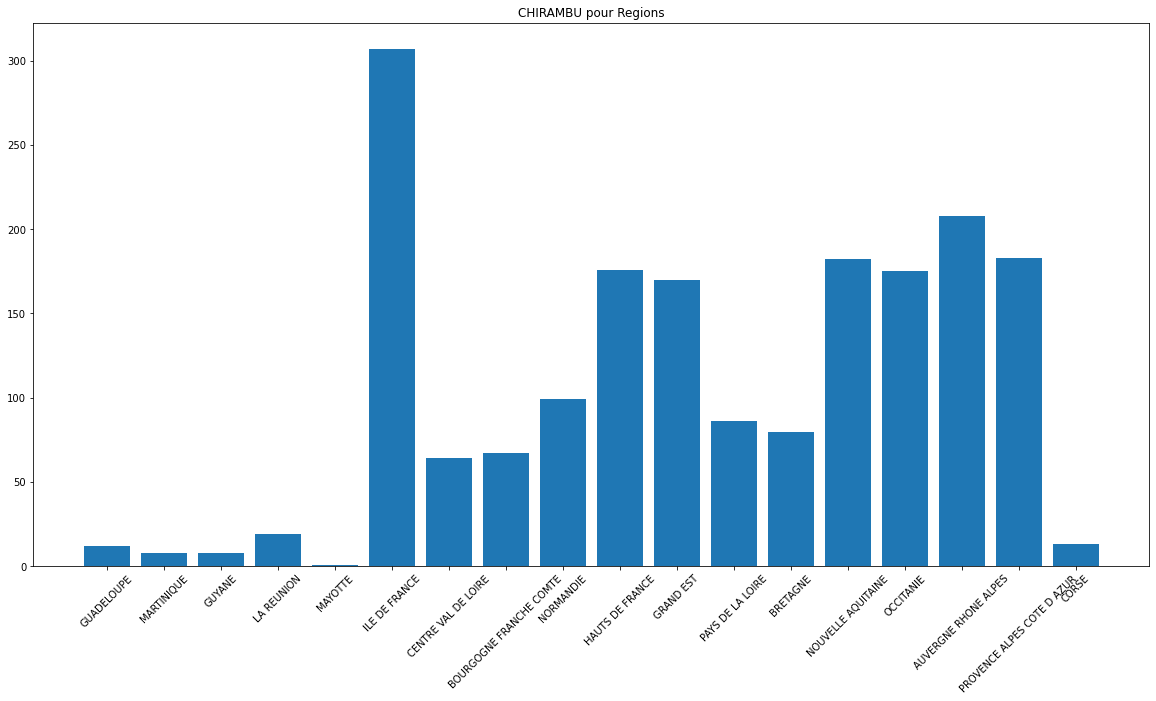

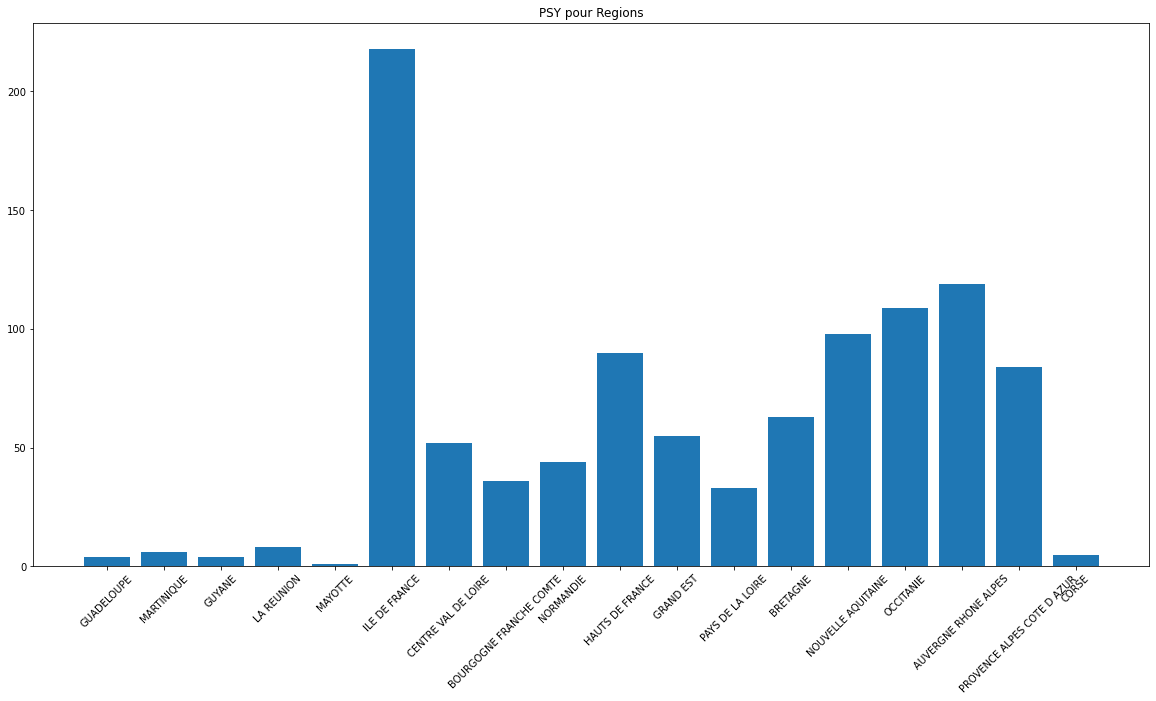

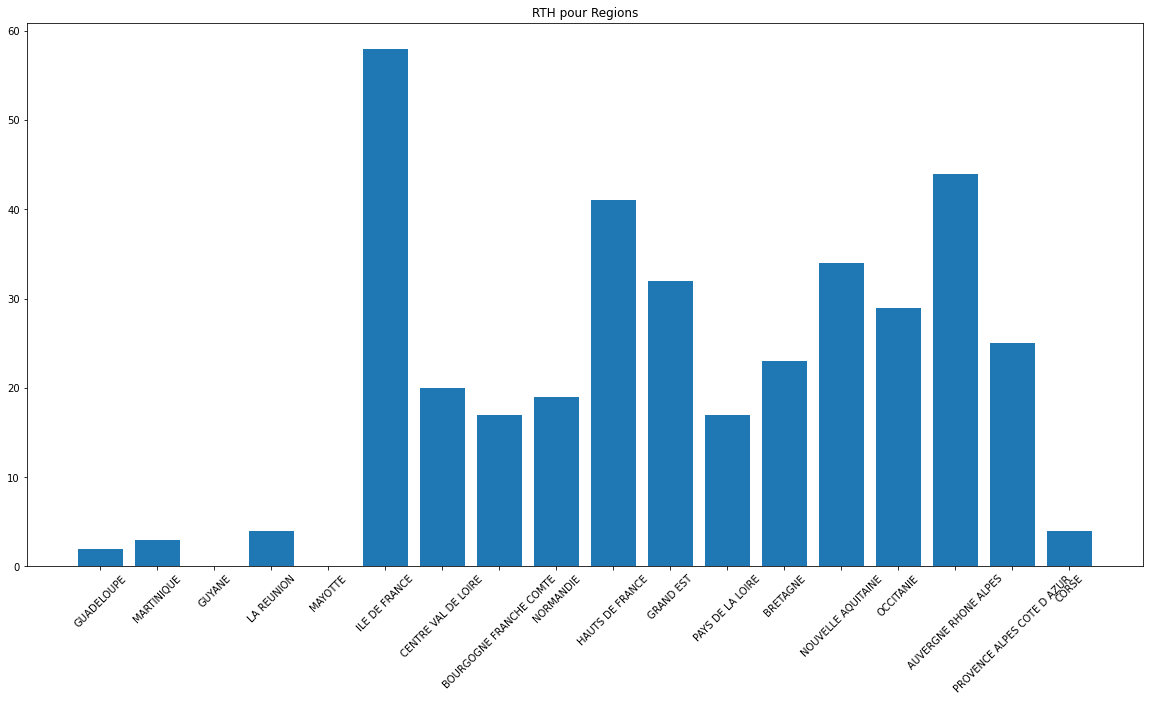

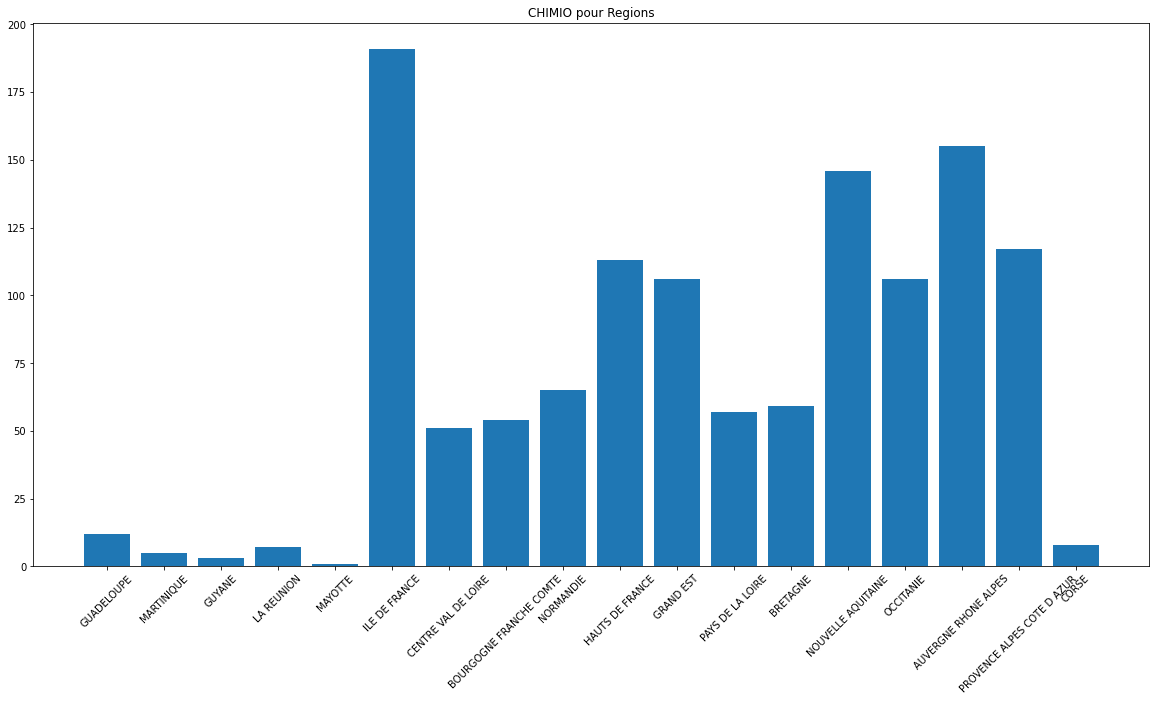

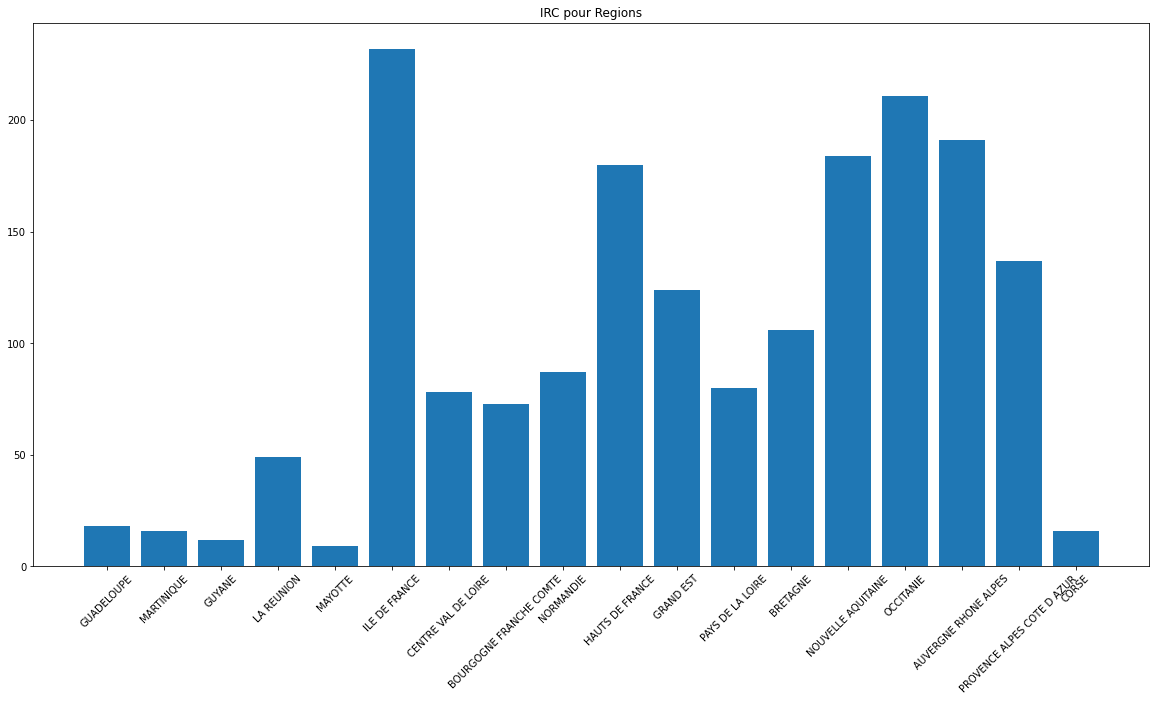

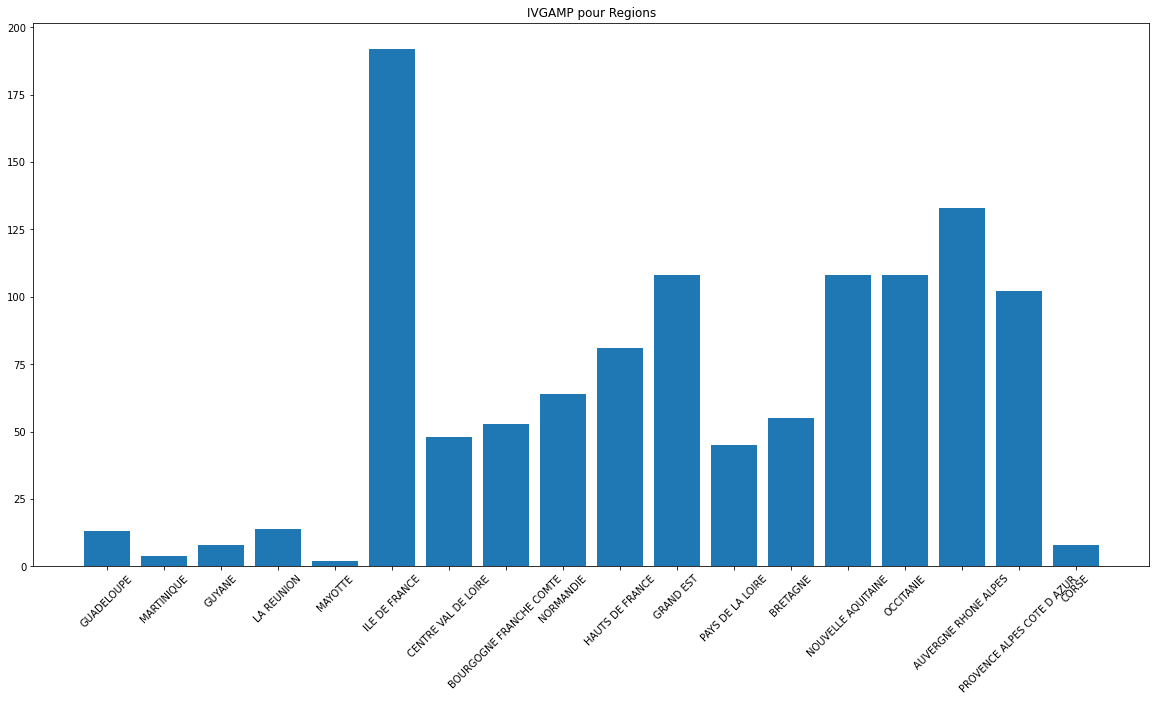

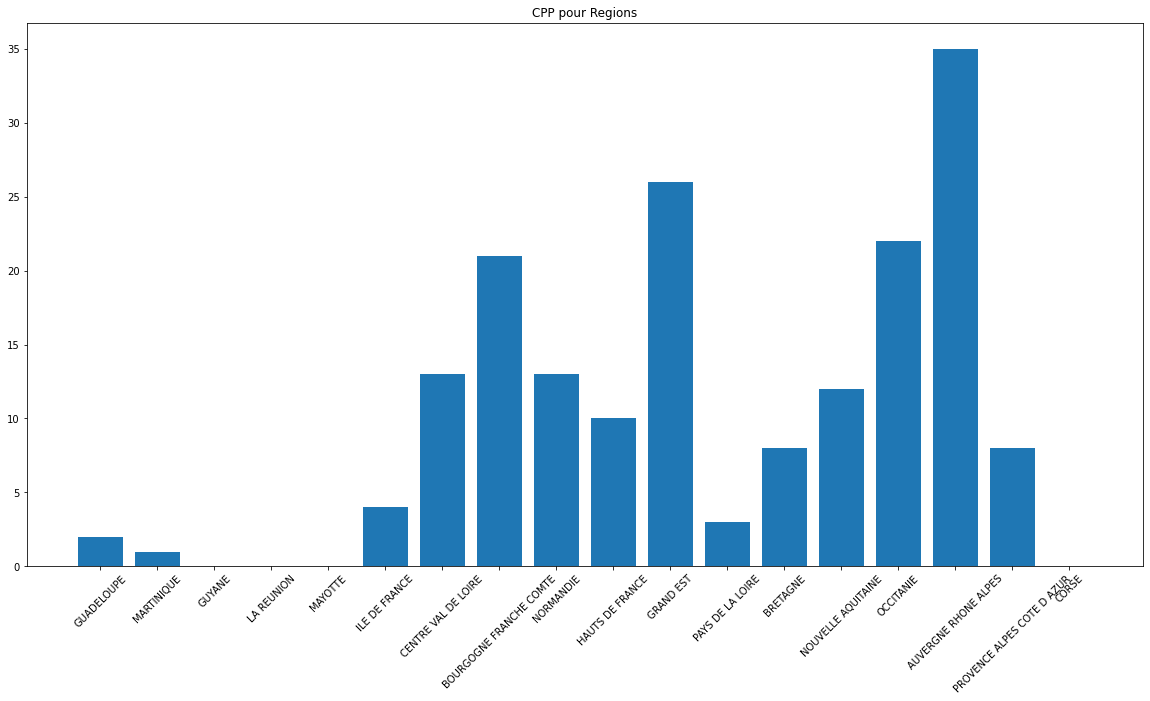

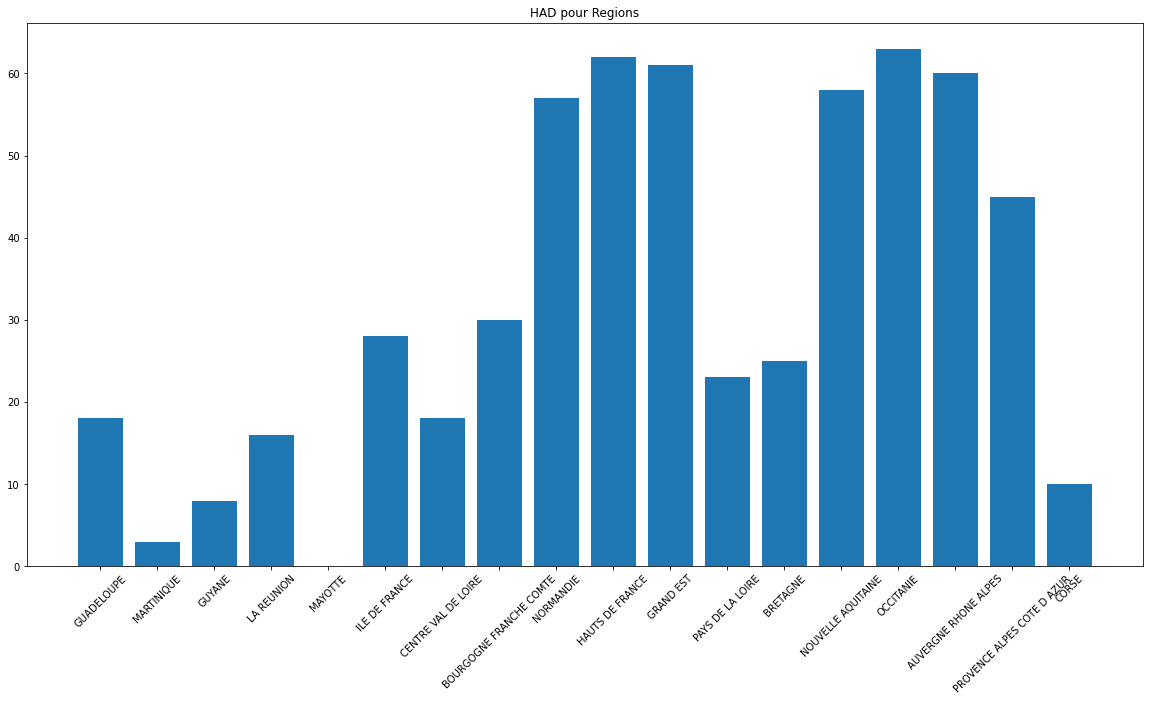

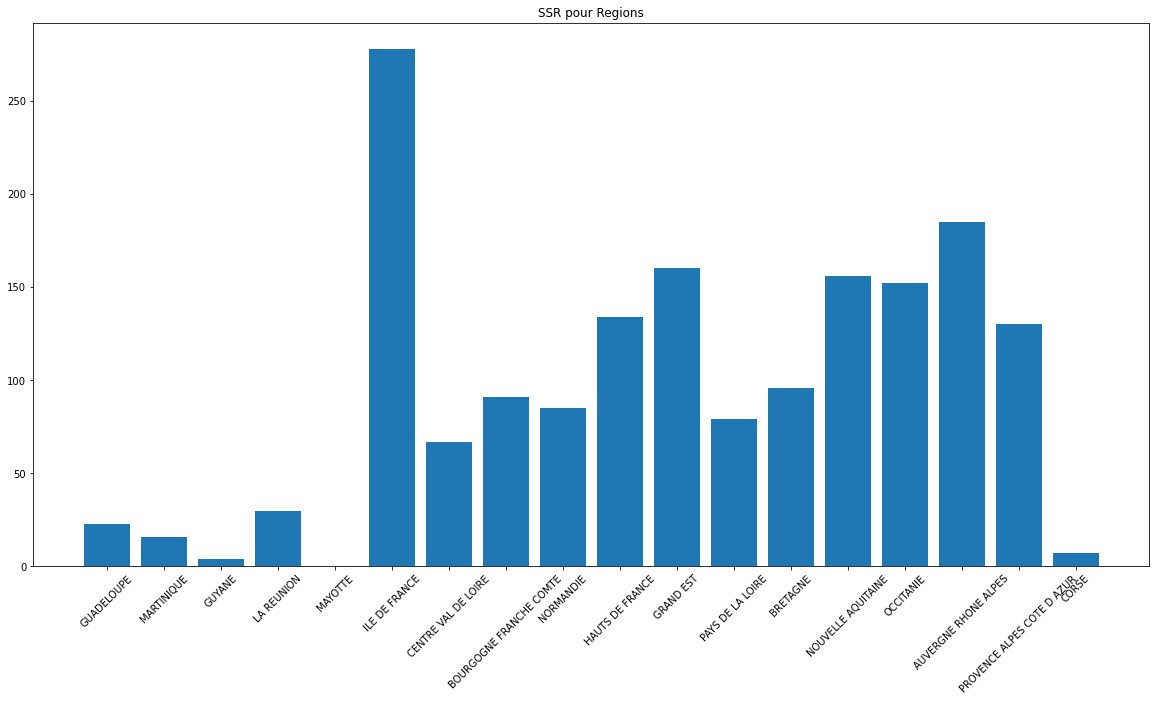

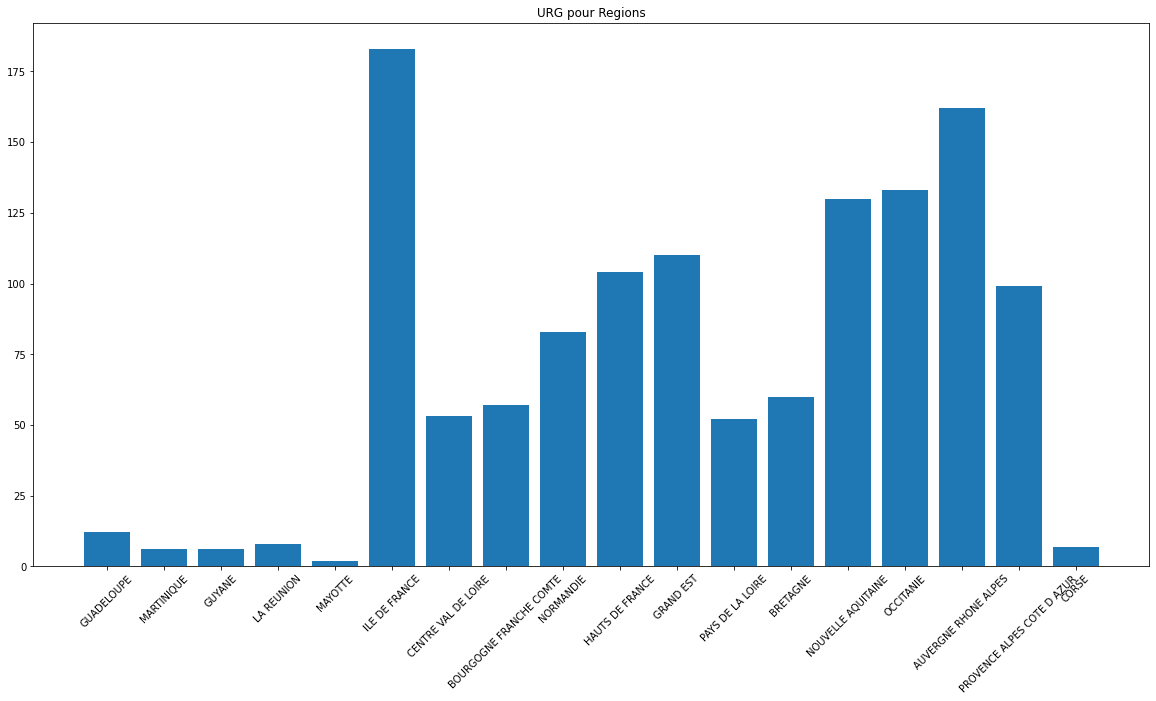

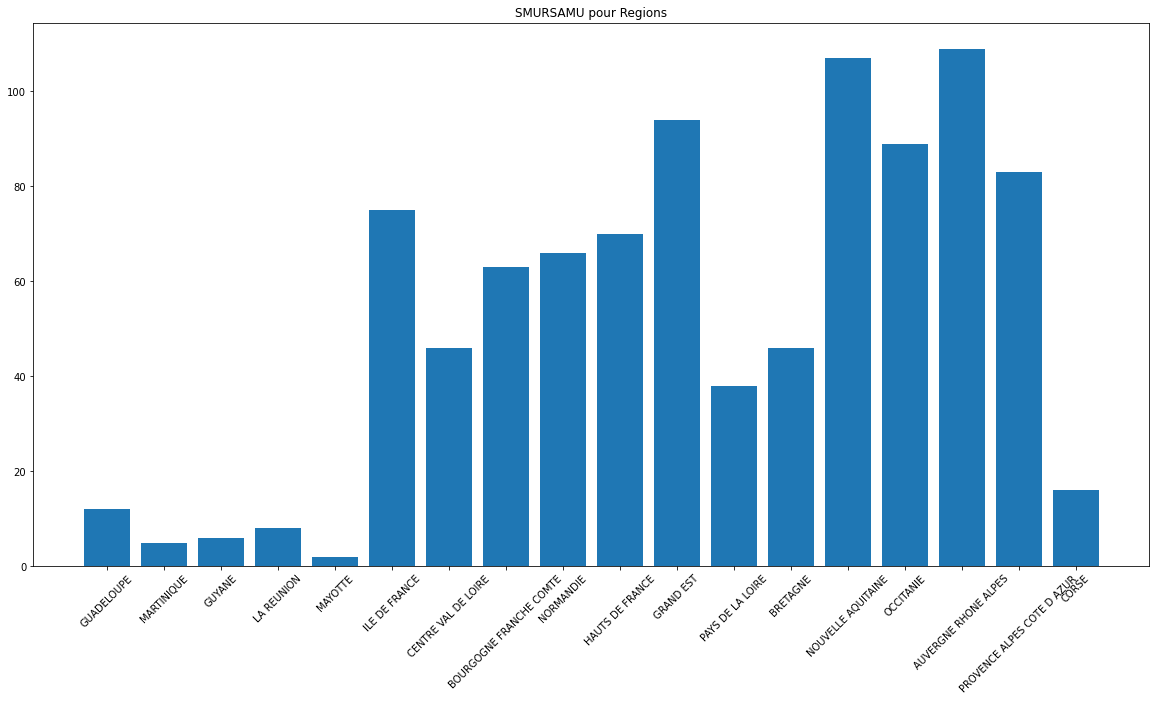

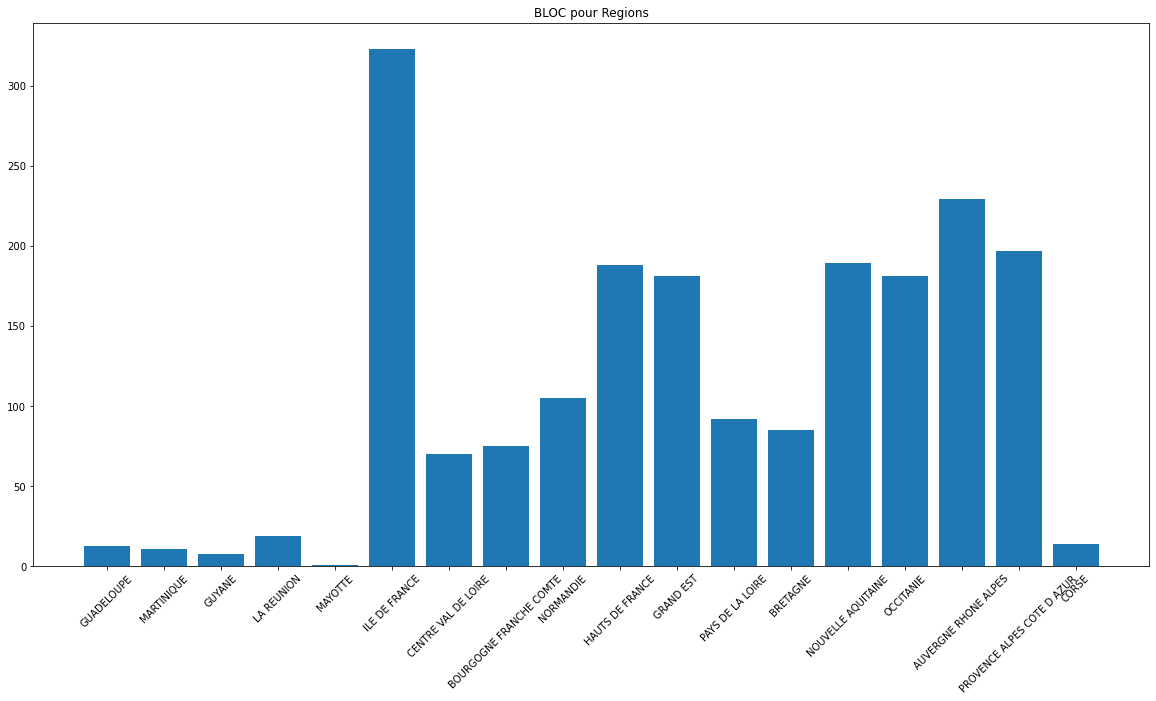

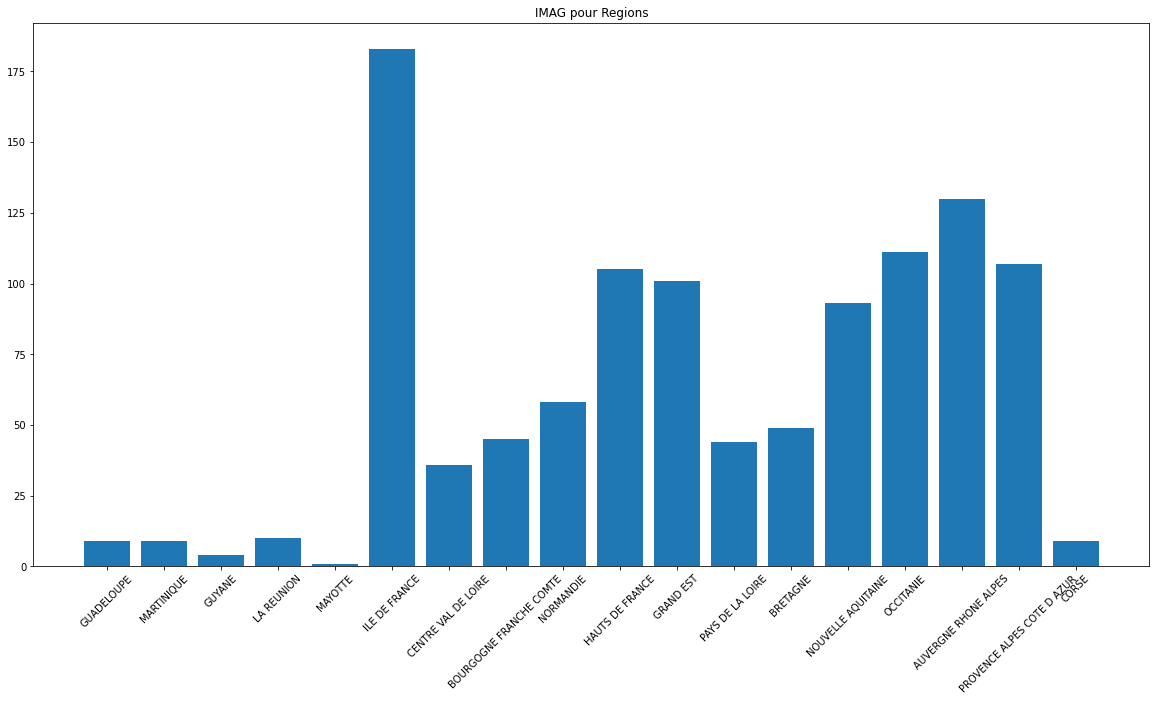

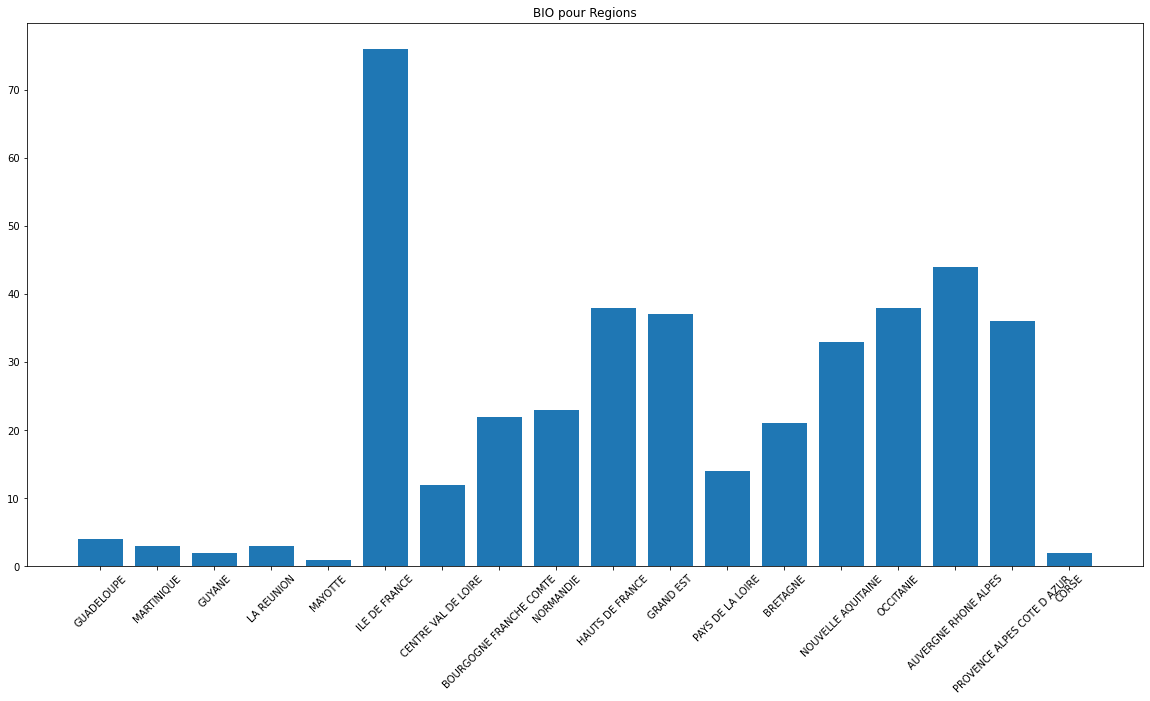

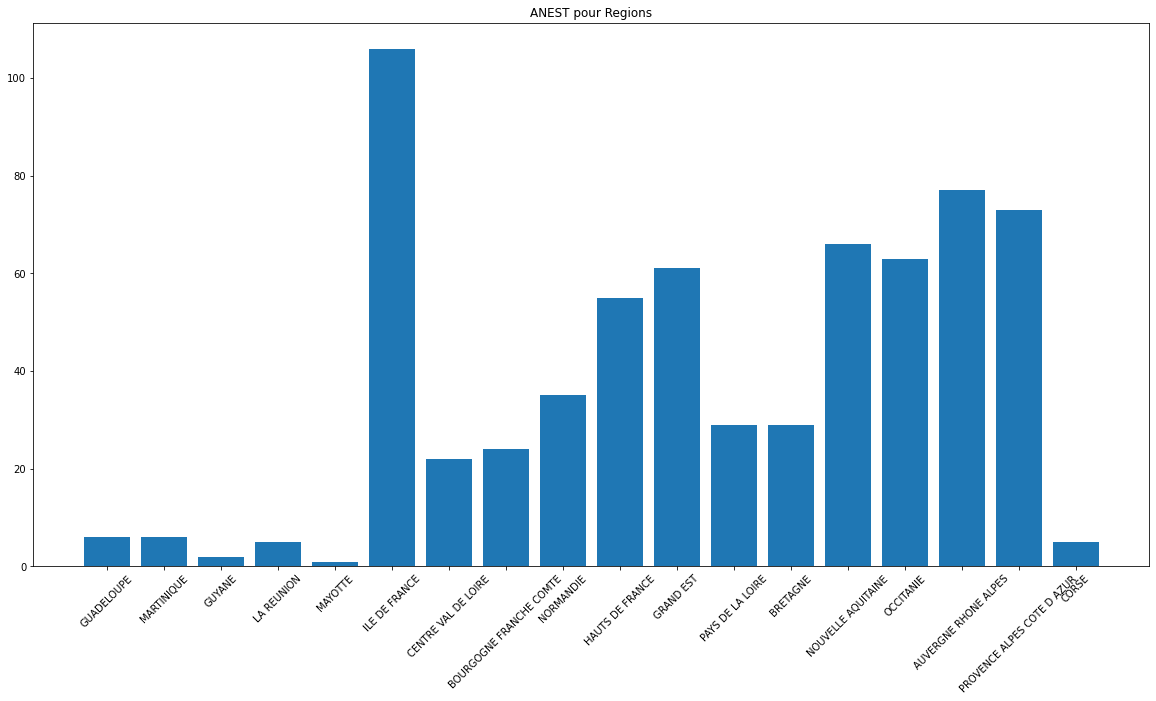

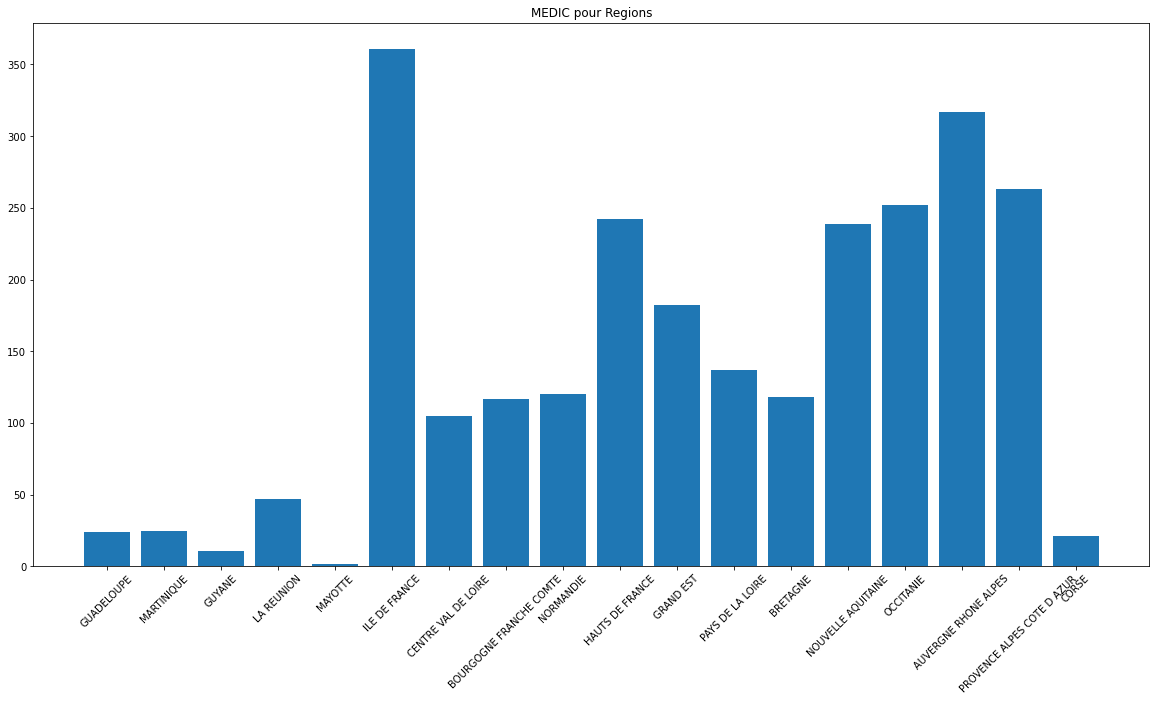

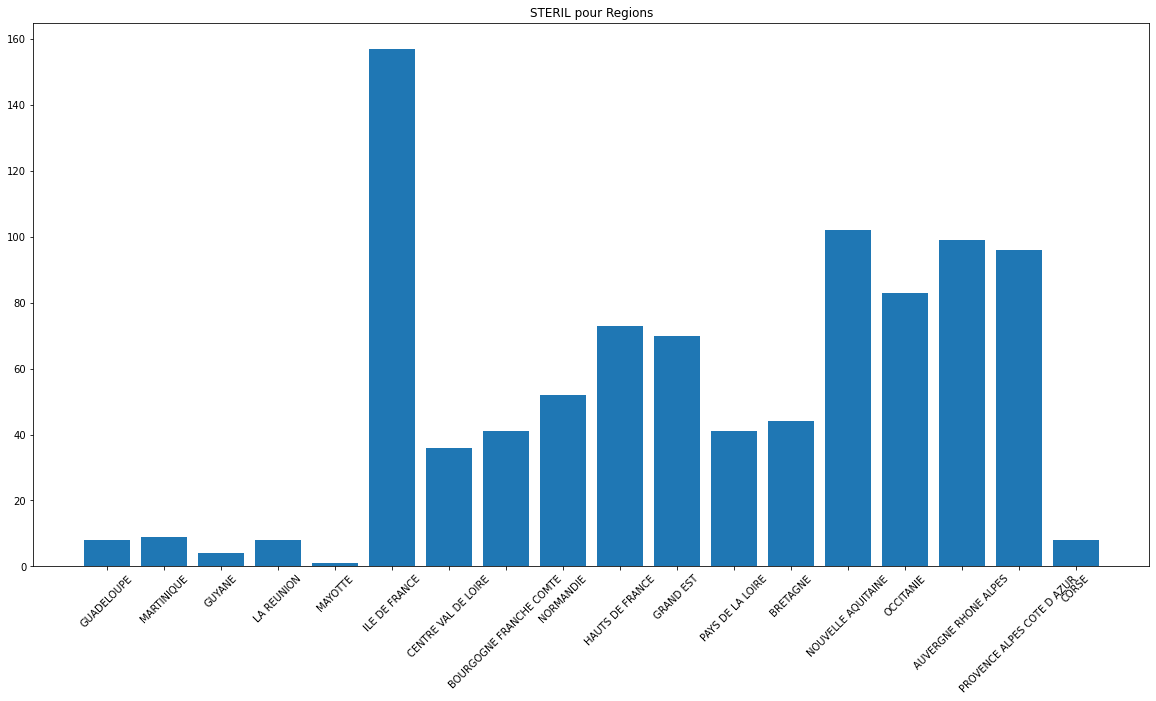

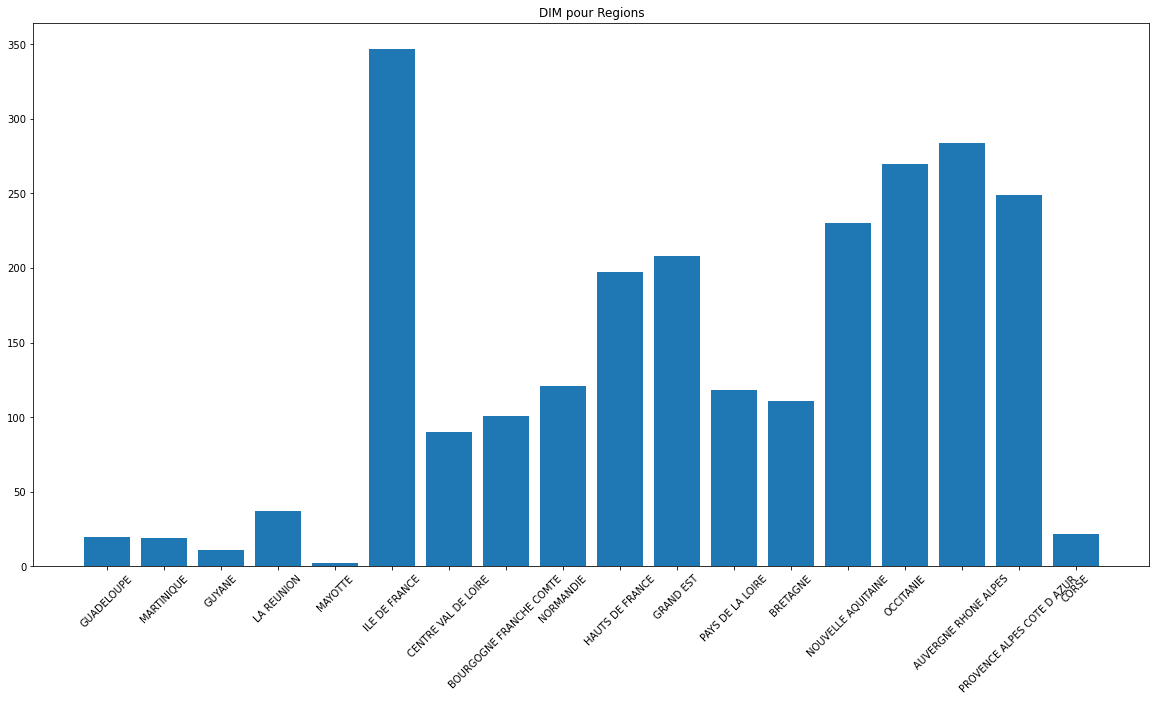

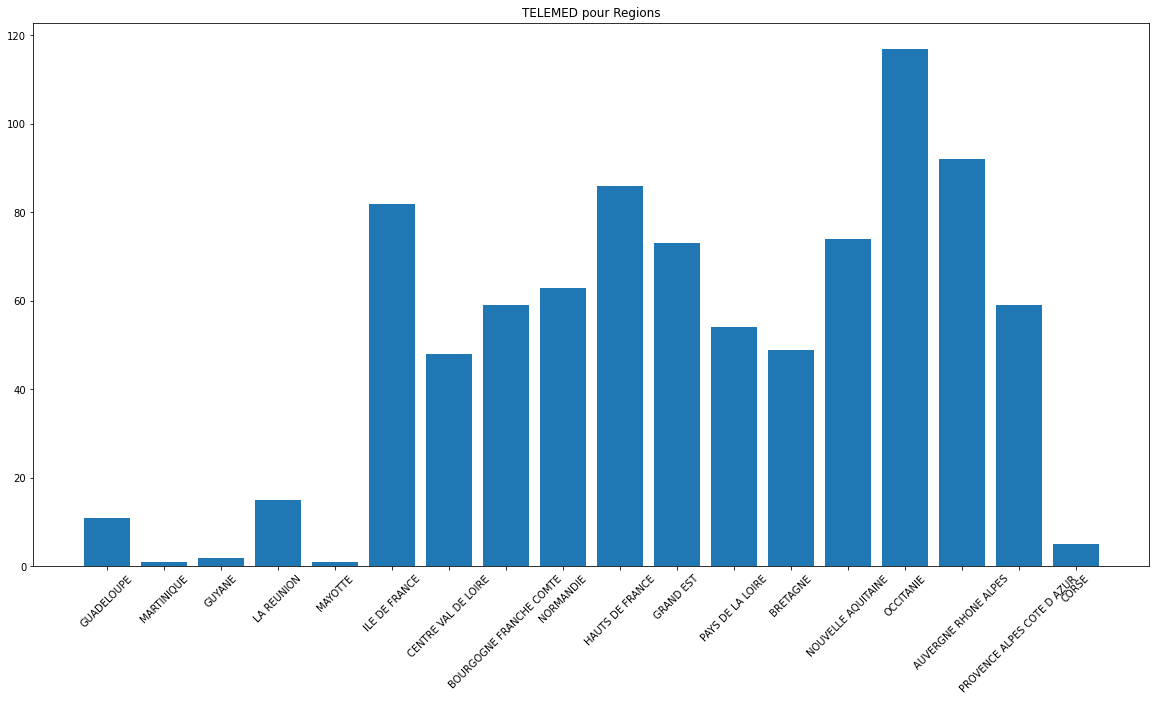

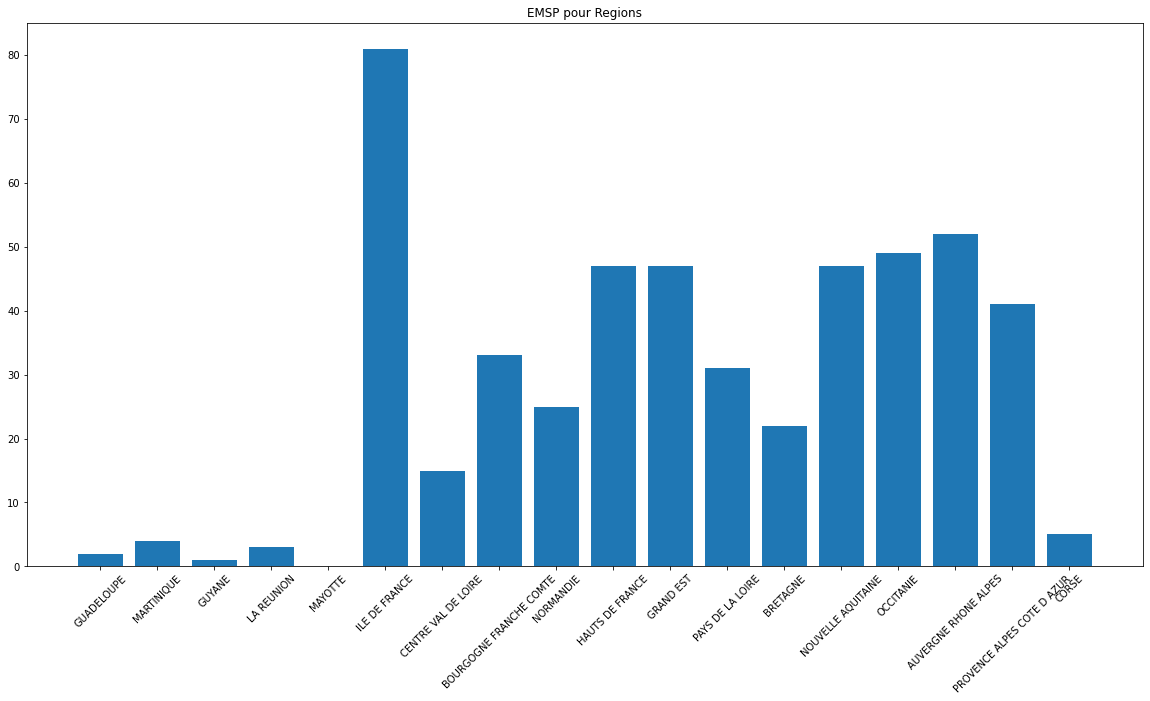

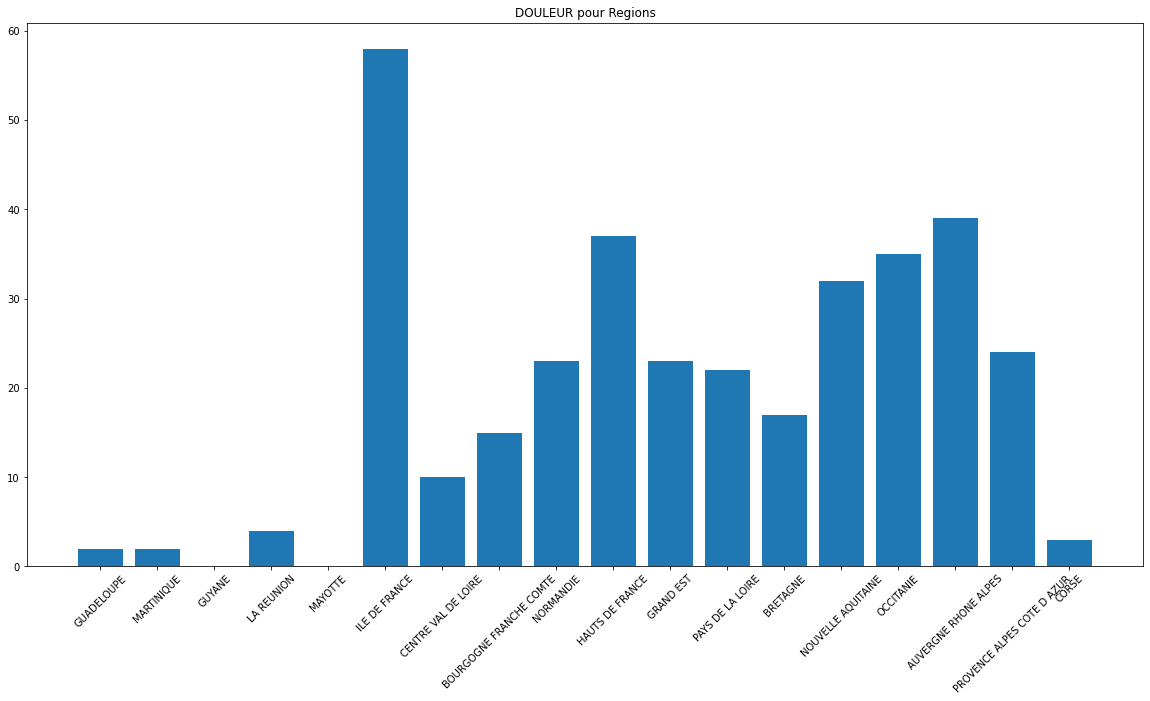

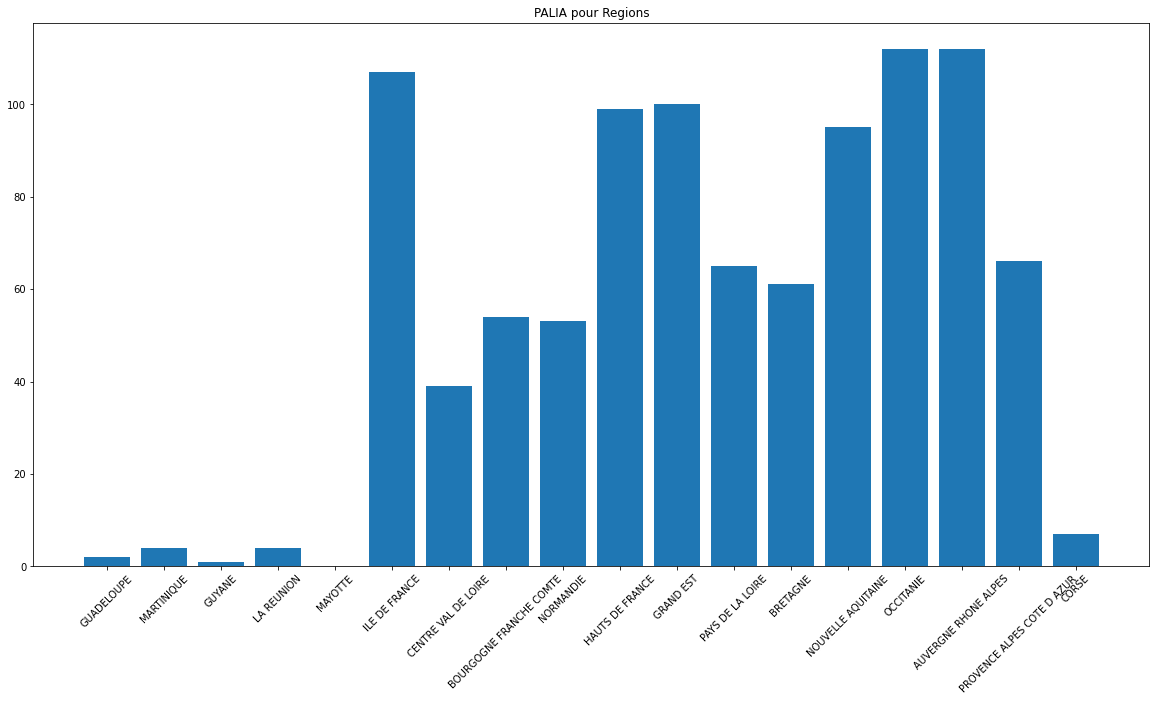

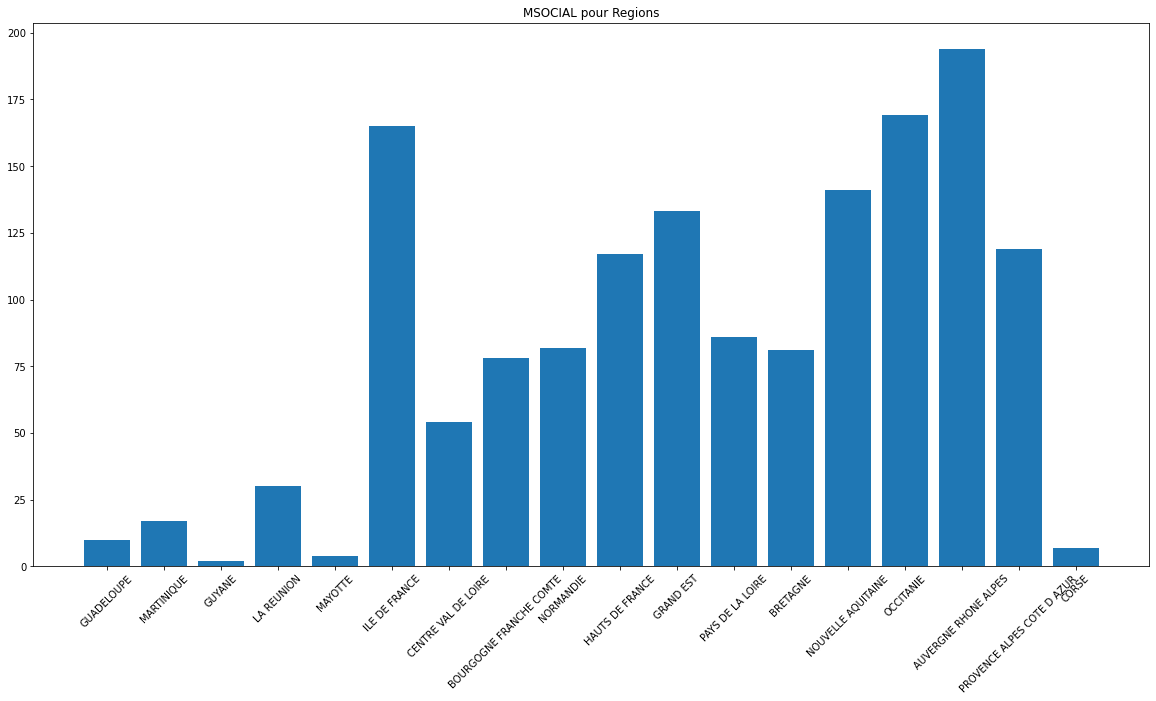

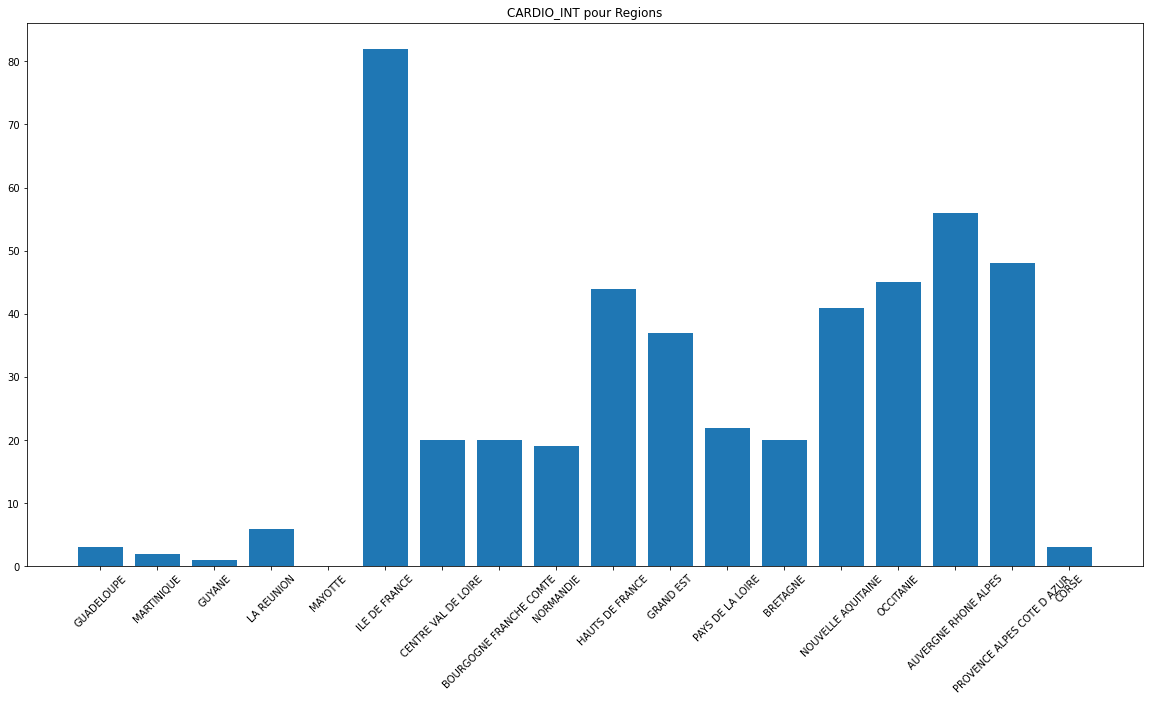

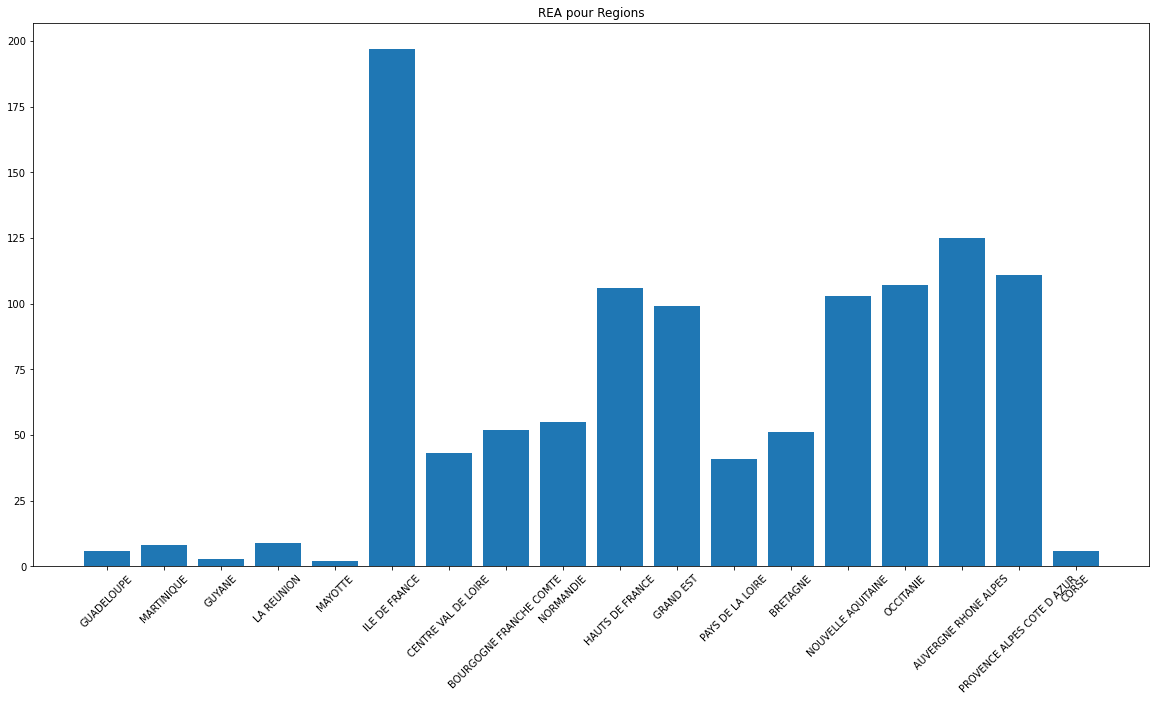

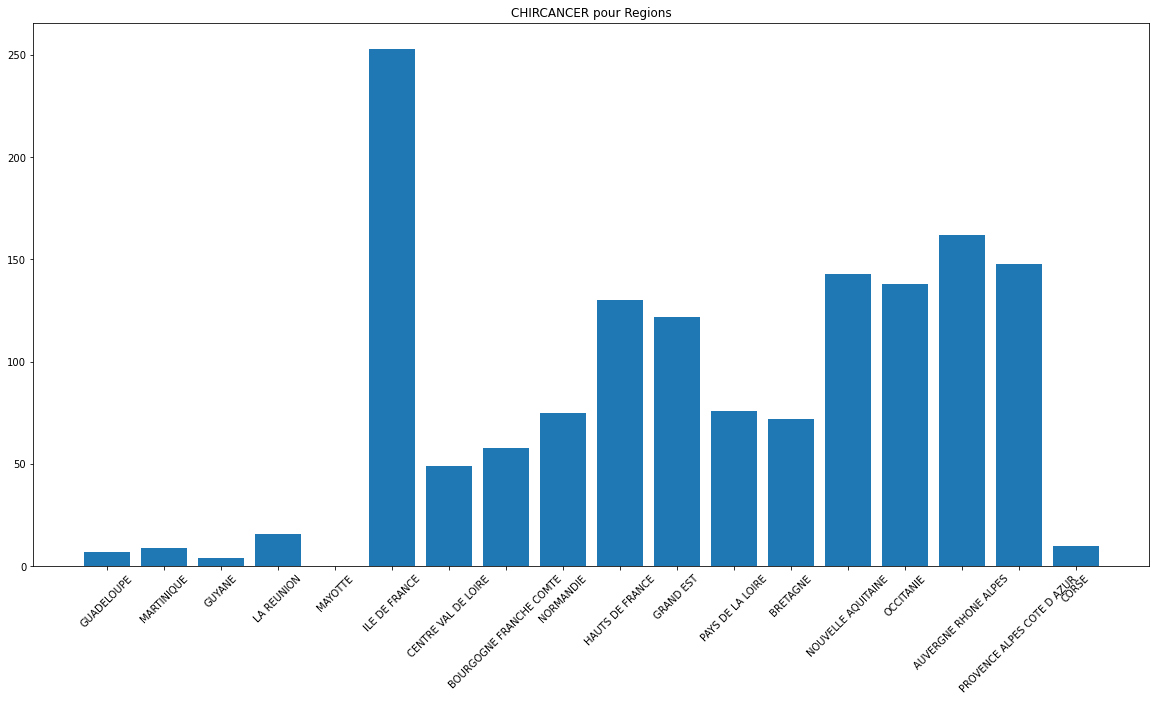

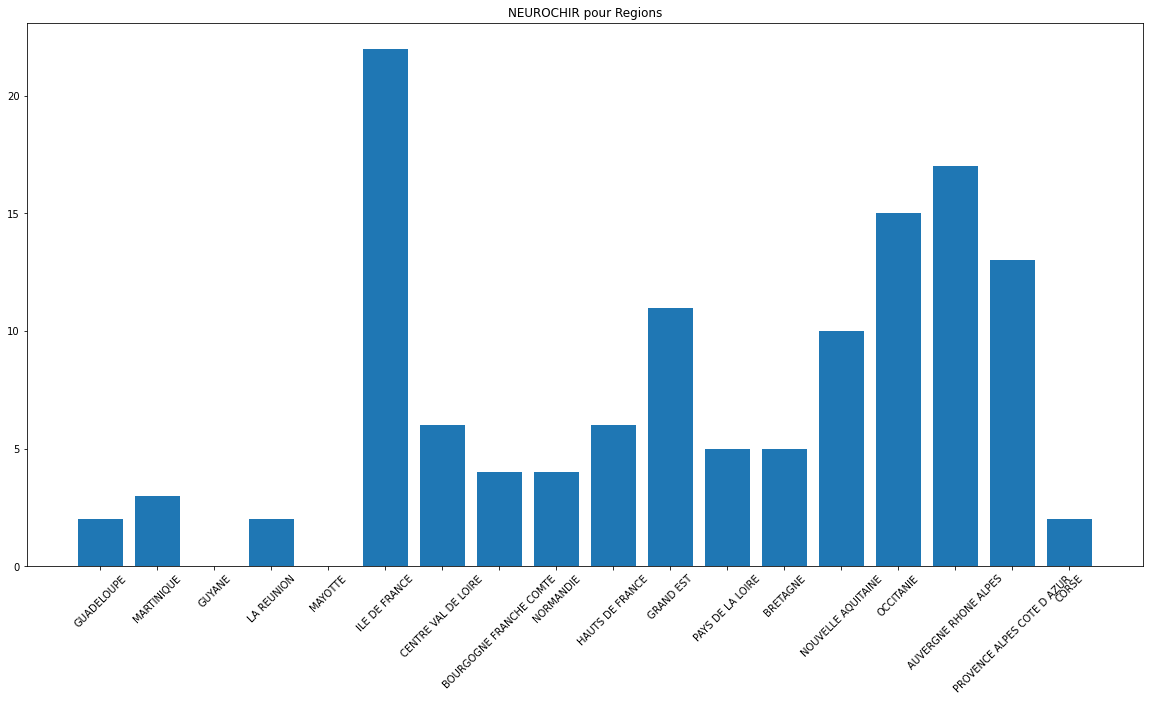

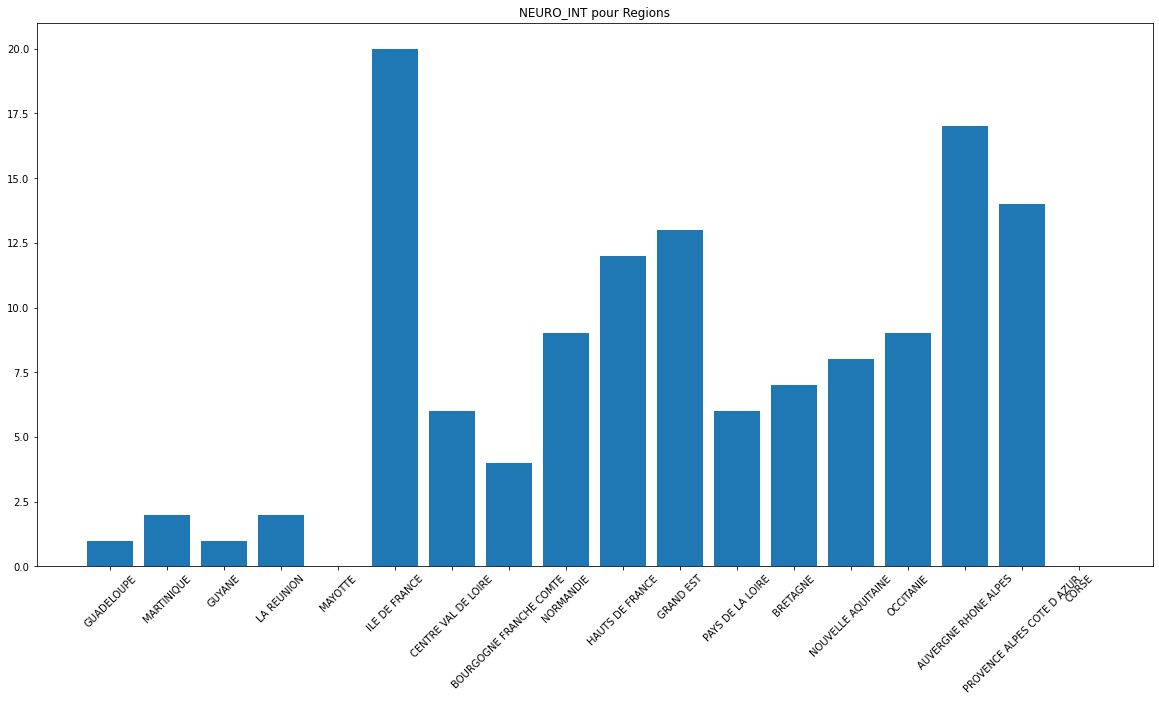

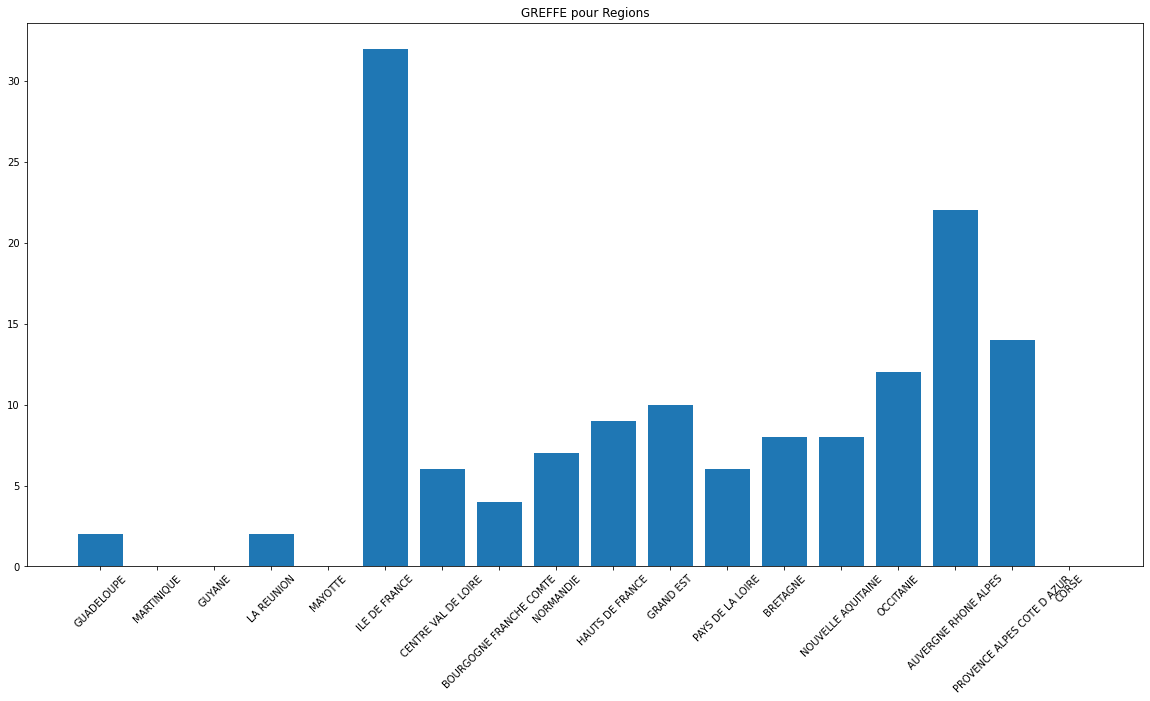

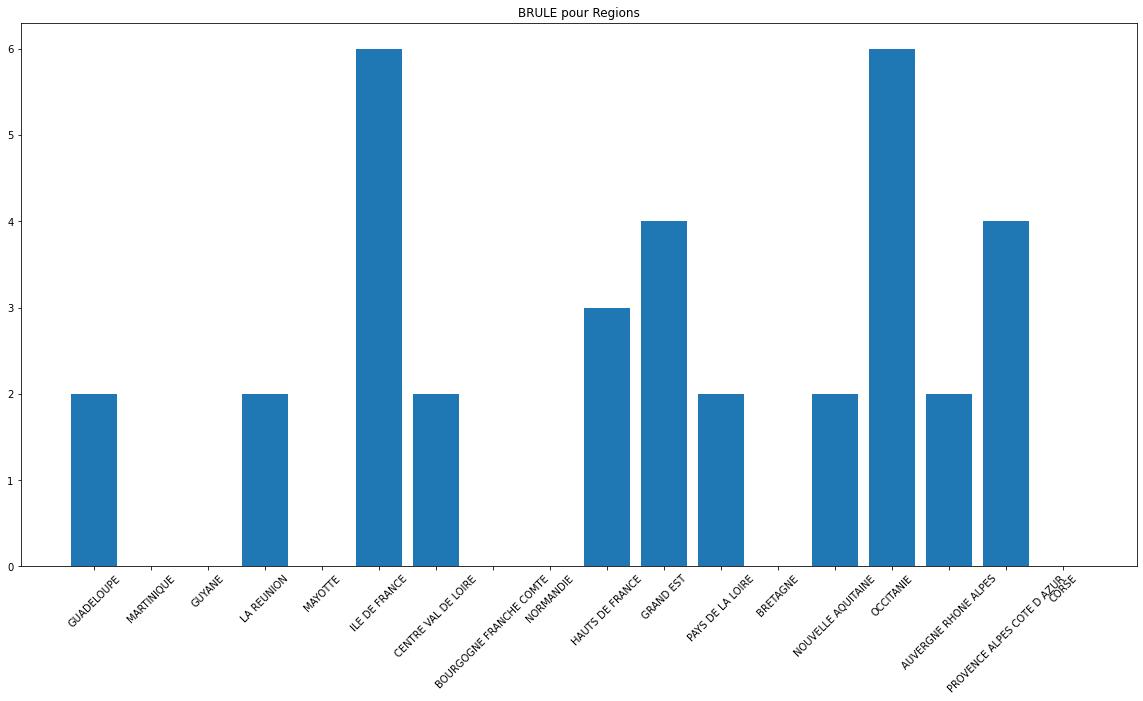

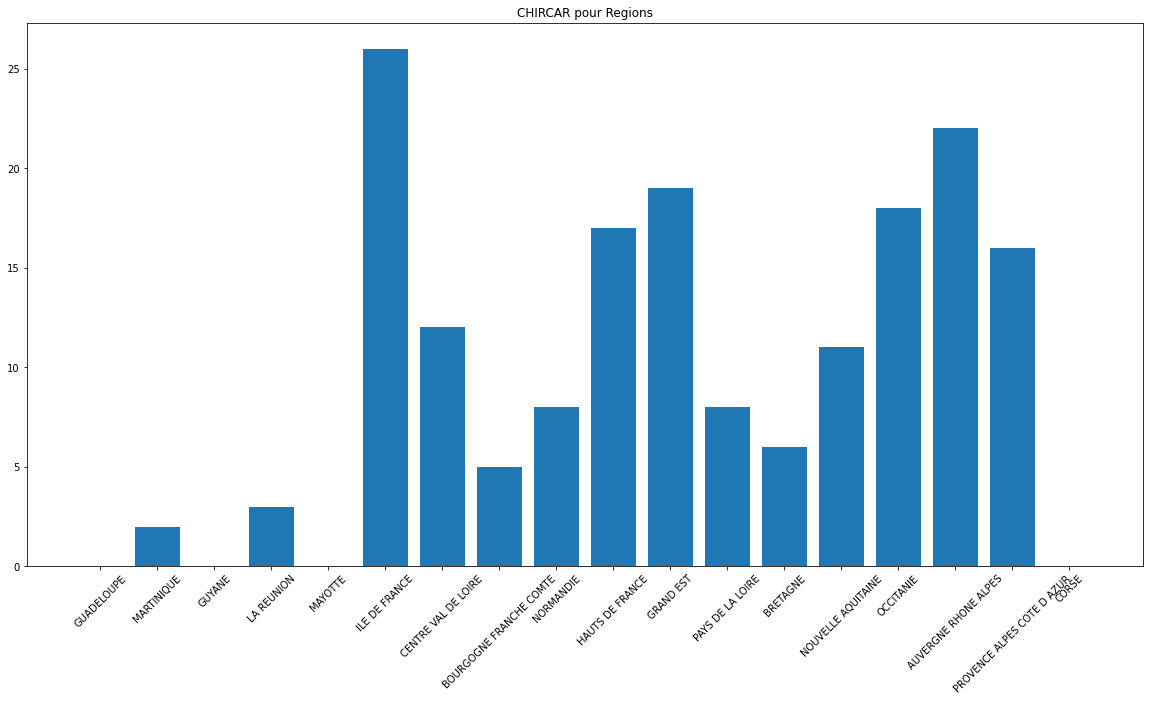

In [172]:
for i  in list_col:
    plt.figure(figsize=(20,10))
    plt.bar(dom_per_reg['Nom Region'],dom_per_reg[i])
    plt.title(f'{i} pour Regions')
    plt.xticks(rotation=45)
    plt.show()